In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [11]:
data = pd.read_csv('/home/atrides/Desktop/R/statistics_with_Python/04_Exploring_Data_with_Graphs/Data_Files/FacebookNarcissism.dat', sep='\s+')
data.head()

,id,NPQC_R_Total,Rating_Type,Rating
0,1,31.0,Attractive,2
1,1,31.0,Fashionable,2
2,1,31.0,Glamourous,2
3,1,31.0,Cool,2
4,2,37.0,Attractive,2


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            776 non-null    int64  
 1   NPQC_R_Total  776 non-null    float64
 2   Rating_Type   776 non-null    object 
 3   Rating        776 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 24.4+ KB


In [13]:
data['Rating_Type'].unique()

array(['Attractive', 'Fashionable', 'Glamourous', 'Cool'], dtype=object)

In [14]:
data['rating_type_num'] = data['Rating_Type'].replace({'Attractive':1,'Fashionable':2, 'Glamourous':3,'Cool':4})

In [15]:
data['Rating_jittered'] = data['Rating'] + 0.5 * np.random.rand(len(data['Rating'])) 

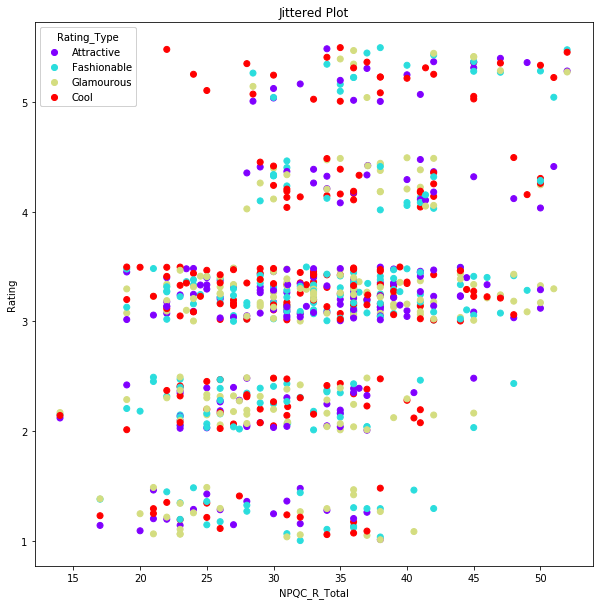

In [17]:
# plotting after adding jitter
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
scatter = ax.scatter(data['NPQC_R_Total'], data['Rating_jittered'], c=data['rating_type_num'], marker='o',cmap=cm.rainbow)
ax.set_xlabel('NPQC_R_Total')
ax.set_ylabel('Rating')
ax.set_title('Jittered Plot')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), title="Rating_Type")
legend1.get_texts()[0].set_text('Attractive')
legend1.get_texts()[1].set_text('Fashionable')
legend1.get_texts()[2].set_text('Glamourous')
legend1.get_texts()[3].set_text('Cool')
ax.add_artist(legend1)
plt.show()

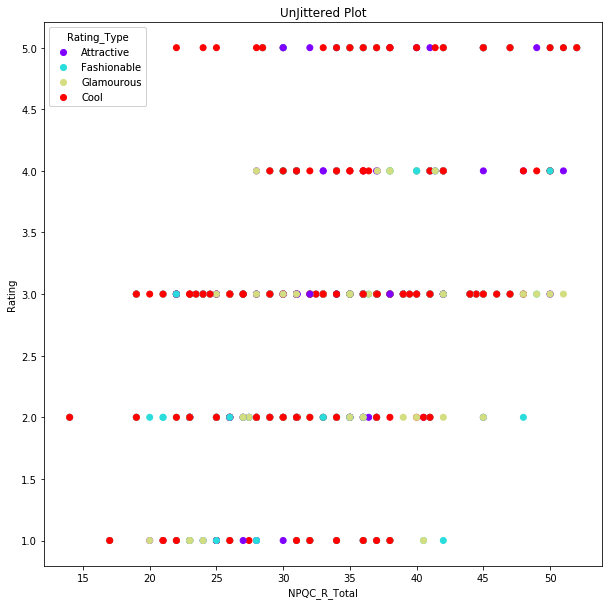

In [18]:
# plotting without jitter
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
scatter = ax.scatter(data['NPQC_R_Total'], data['Rating'], c=data['rating_type_num'], marker='o',cmap=cm.rainbow)
ax.set_xlabel('NPQC_R_Total')
ax.set_ylabel('Rating')
ax.set_title('UnJittered Plot')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), title="Rating_Type")
legend1.get_texts()[0].set_text('Attractive')
legend1.get_texts()[1].set_text('Fashionable')
legend1.get_texts()[2].set_text('Glamourous')
legend1.get_texts()[3].set_text('Cool')
ax.add_artist(legend1)
plt.show()

In [19]:
groups = data.groupby('Rating_Type')

In [25]:
n=0
for name,group in groups:
  for x in group.values:
    if n<=5:
      print(x)
      n+=1

[1 31.0 'Attractive' 2 1 2.3045882068343118]
[2 37.0 'Attractive' 2 1 2.0078885751454454]
[5 44.47 'Attractive' 3 1 3.4001609520000273]
[6 30.0 'Attractive' 1 1 1.2453254755693453]
[7 28.0 'Attractive' 4 1 4.355424284498369]
[13 42.0 'Attractive' 5 1 5.370167512646363]


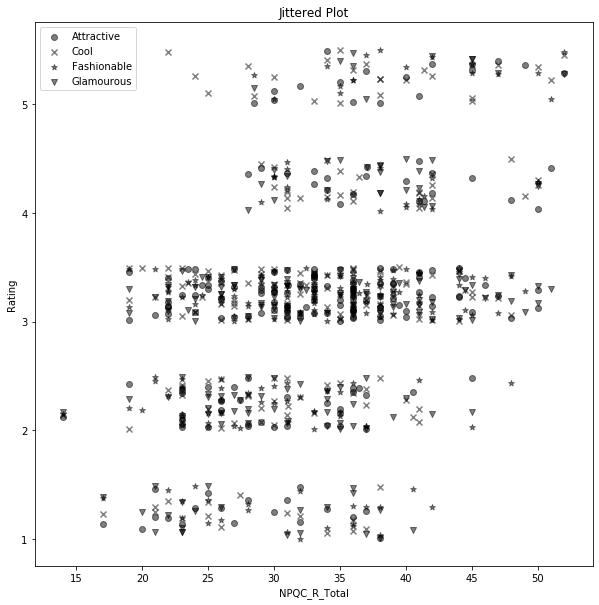

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
#scatter = ax.scatter(data['NPQC_R_Total'], data['Rating_jittered'],  marker='o',cmap=cm.rainbow)
ax.set_xlabel('NPQC_R_Total')
ax.set_ylabel('Rating')
ax.set_title('Jittered Plot')
count1,count2,count3,count4 = 0,0,0,0
for name,group in groups:
  for x in group.values:
    if x[2]=='Attractive':
      if count1==0:
        ax.scatter(x[1], x[5],marker='o',c='black',alpha=0.5,label='Attractive')
        count1+=1
      else:
        ax.scatter(x[1], x[5],marker='o',c='black',alpha=0.5)
    if x[2]=='Fashionable':
      if count2==0:
        ax.scatter(x[1], x[5],marker='*',c='black',alpha=0.5,label='Fashionable')
        count2+=1
      else:
        ax.scatter(x[1], x[5],marker='*',c='black',alpha=0.5)
    if x[2]=='Glamourous':
      if count3==0:
        ax.scatter(x[1], x[5],marker='v',c='black',alpha=0.5,label='Glamourous')
        count3+=1
      else:
        ax.scatter(x[1], x[5],marker='v',c='black',alpha=0.5)
    if x[2]=='Cool':
      if count4==0:
        ax.scatter(x[1], x[5],marker='x',c='black',alpha=0.5,label='Cool')
        count4+=1
      else:
        ax.scatter(x[1], x[5],marker='x',c='black',alpha=0.5)
ax.legend()
plt.show()